# Word2Vec

Voy a utilizar word2vec para ver palabras similiares que me agrupen los Motivos de las encuestas que ya encontré con LDA, y los posibles atributos que describan al problema del cliente.

In [1]:
from collections import defaultdict
import re
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import gensim

import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from gensim import corpora, models, similarities, matutils
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.matutils import cossim
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
import nltk

import pickle
import random
import sys
from tqdm import tqdm
from sklearn import manifold
import time

start_time = time.time()

%matplotlib inline

from playsound import playsound


sys.path.append("../source")


In [2]:
import random
random.seed(100)
random_state = 100

In [3]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from gensim.models.phrases import Phrases, Phraser

In [4]:
path_df = "..\\..\\..\\data_nps\\"
path_processed = "..\\..\\..\\data_nps\\processed\\"
figures = "..\\figures\\"

In [5]:
path_df = "..\\..\\..\\data_nps\\"
path_processed = "..\\..\\..\\data_nps\\processed\\"
dashboard = "..\\..\\..\\data_nps\\dashboard\\"
muestreo = "..\\..\\..\\data_nps\\muestreo\\"
sonido = "..\\figures\\"

In [6]:
comments = pd.read_csv(dashboard + "motivos-atributos-col.csv")
print(f"Tamaño del Dataset: {comments.shape}")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Tamaño del Dataset: (114230, 208)


In [7]:
comments.mot1.unique()

array([nan, 'Servicio', 'Atencion', 'Cobertura&poliza',
       'FacturacionPagos', 'Grua', 'Siniestro', 'Accesibilidad',
       'Document&gestion', 'Precio'], dtype=object)

In [8]:
len(comments)

114230

In [9]:
nps_dict = {
    0:"Detractor",
    1:"Detractor",
    2:"Detractor",
    3:"Detractor",
    4:"Detractor",
    5:"Detractor",
    6:"Detractor",
    7:"Neutro",
    8:"Neutro",
    9:"Promotor",
    10:"Promotor"
}

In [10]:
comments["NPS_SEGMENT"] = comments.TNPS_SCORE.apply(lambda x: nps_dict[x])

atencion["comments_clean"]= atencion["comments_clean"].apply(lambda x: re.sub(r"seguro .*","", x))
atencion["comments_clean"]= atencion["comments_clean"].apply(lambda x: re.sub(r"caja .*","", x))
atencion["comments_clean"]= atencion["comments_clean"].apply(lambda x: re.sub(r"atencion .*","", x))
atencion["comments_clean"]= atencion["comments_clean"].apply(lambda x: re.sub(r"atendieron .*","", x))

In [11]:
STOP_WORDS = stopwords.words('spanish')

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>2]

In [12]:
comments["token"] = comments["comments_clean"].apply(lambda x:tokenize(x))

In [13]:
len(comments[comments["NPS_SEGMENT"] == "Detractor"])

18385

In [14]:
comments = comments[comments["NPS_SEGMENT"] == "Detractor"]

In [15]:
word_list = comments.token.tolist()

In [16]:
print("el corpus tiene",len(word_list), "oraciones y",sum([len(x) for x in word_list]),"palabras")

el corpus tiene 18385 oraciones y 263581 palabras


In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        #vuelve todo a lower case y saca puntuaciones y convierte cada documento de texto en una lista de palabras
        yield(gensim.utils.simple_preprocess(str(sentence), deacc =True))

In [18]:
train_w = list(sent_to_words(word_list))

In [19]:
collocations = Phrases(sentences=train_w, min_count=10,threshold=0.5,scoring='npmi') # threshold: minimo score aceptado

In [20]:
to_collocations = Phraser(collocations)

In [21]:
df_collocations =pd.DataFrame([x for x in collocations.export_phrases(train_w)],columns=["bigram","score"])
df_collocations.shape

(9079, 2)

In [22]:
df_collocations.drop_duplicates().sort_values(by="score",ascending=False).head(50)

,bigram,score
219,b'fitz roy',0.993756
68,b'call center',0.986225
5570,b'sebastian hahn',0.983433
338,b'federacion patronal',0.974224
987,b'home banking',0.965746
107,b'lomas zamora',0.924871
17,b'defensa consumidor',0.918269
353,b'pack comodo',0.907968
165,b'buenas tardes',0.889989
92,b'carta documento',0.878276


In [23]:
trainset_ngrams = to_collocations[train_w]

In [24]:
trainset_ngrams

# Embeddings

In [25]:
bigram_reloaded = trainset_ngrams

In [26]:
w2v_model = Word2Vec(bigram_reloaded, workers=4,size=20, min_count = 10, window = 30, sample = 1e-3,negative=5,sg=1)
#w2v_model.save("word2vec_20dim")  # save model
#w2v_model = Word2Vec.load("word2vec_20dim")  # load model

In [27]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [28]:
from sklearn.decomposition import PCA


## Distancia entre palabras

## Palabras similares 

w2v_model.most_similar(positive=["malo"], topn=300)

w2v_model.most_similar(positive=["servicio"], topn=100)

In [29]:
vocab = list(w2v_model.wv.vocab)
len(vocab)

3101

In [30]:
X = w2v_model[vocab]


<ipython-input-30-dfab40a57f9a>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = w2v_model[vocab]


In [31]:
pca = PCA(n_components=3, random_state=11, whiten=True)
clf = pca.fit_transform(X)

tmp = pd.DataFrame(clf, index=vocab, columns=['x', 'y', 'z'])

tmp.head(3)

,x,y,z
pedi,-0.311583,-0.013341,1.089999
seguro,0.594916,-0.251459,0.973493
auto,0.049859,0.983035,0.748594


In [32]:
tmp = tmp.sample(100)

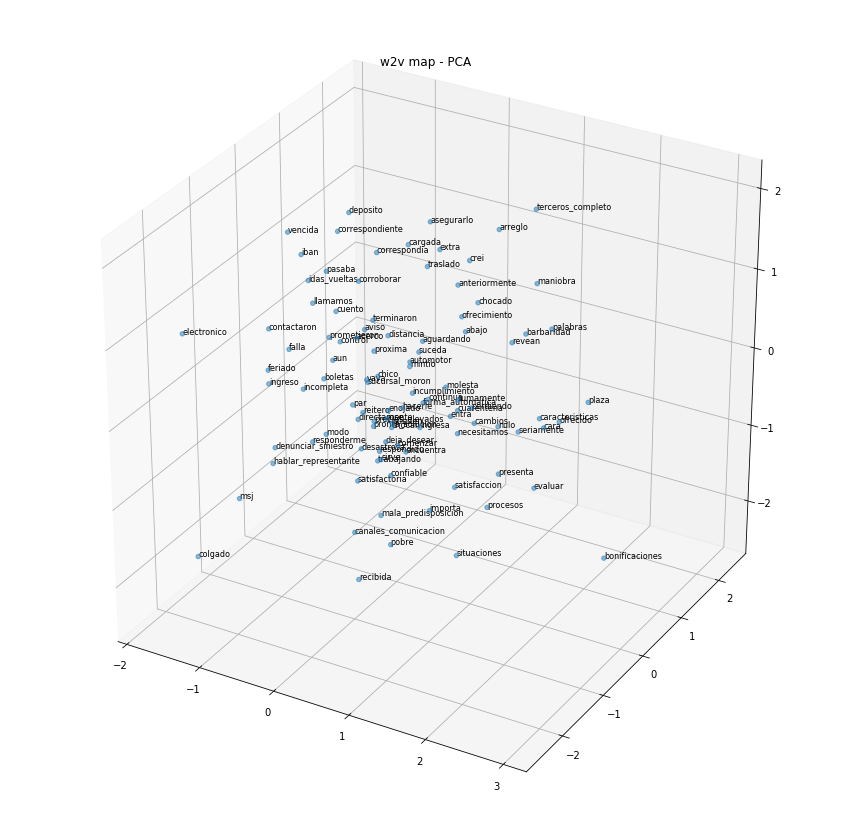

In [33]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tmp['x'], tmp['y'], tmp['z'], alpha = 0.5)

for word, row in tmp.iterrows():
    x, y, z = row
    pos = (x, y, z)
    ax.text(x, y, z, s=word, size=8, zorder=1, color='k')
    
plt.title('w2v map - PCA')
plt.show()

In [34]:
w2v_model.wv.save_word2vec_format('total')


model = Word2Vec(sentences)
model.wv.save_word2vec_format('model_name')
And then convert the model to the input files required by Embedding Projector:

python -m gensim.scripts.word2vec2tensor --input model_name --output model_name
This will produce both: model_name_tensor.tsv and model_name_metadata.tsv

This last script was introduced in a PR from the issue linked in a comment in your original question.


In [ ]:
python -m gensim.scripts.word2vec2tensor --input total --output total This will produce both: total.tsv and total_metadata.tsv

In [36]:
print("--- %s segundos---" % (time.time() - start_time))
playsound(sonido+"war.mp3")
import gc 
gc.collect()

--- 65.9766321182251 segundos---


336